In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Import data dari excel
df = pd.read_excel("factbook-_1_.xls")

df

,Country,Area,Birth rate,Current account balance,Death rate,Electricity consumption,Electricity production,Exports,GDP,GDP per capita,...,Life expectancy at birth,Military expenditures,Natural gas consumption,Oil consumption,Population,Public debt,Railways,Reserves of foreign exchange & gold,Total fertility rate,Unemployment rate
0,Japan,"377,835",9.47,"$170,200,000,000.00",8.95,"971,000,000,000","1,044,000,000,000.00","$538,800,000,000.00","$3,745,000,000,000.00","$29,400.00",...,81.15,1,"80,420,000,000.00","5,290,000","127,417,244",164.3,23705,"664,600,000,000.00",1.39,4.7
1,Germany,"357,021",8.33,"$73,590,000,000.00",10.55,"519,500,000,000","560,000,000,000.00","$893,300,000,000.00","$2,362,000,000,000.00","$28,700.00",...,78.65,1.5,"99,550,000,000.00","2,891,000","82,431,390",65.8,46039,"96,840,000,000.00",1.39,10.6
2,Saudi Arabia,"1,960,582",29.56,"$51,500,000,000.00",2.62,"128,500,000,000","138,200,000,000.00","$113,000,000,000.00","$310,200,000,000.00","$12,000.00",...,75.46,10,"56,400,000,000.00","1,550,000","26,417,599",75,1392,"23,620,000,000.00",4.05,25
3,Russia,"17,075,200",9.80,"$46,040,000,000.00",14.52,"894,300,000,000","915,000,000,000.00","$162,500,000,000.00","$1,408,000,000,000.00","$9,800.00",...,67.10,,"405,800,000,000.00","2,310,000","143,420,309",28.2,87157,"124,500,000,000.00",1.27,8.3
4,Switzerland,"41,290",9.77,"$40,950,000,000.00",8.48,"54,530,000,000","63,470,000,000.00","$130,700,000,000.00","$251,900,000,000.00","$33,800.00",...,80.39,1,"3,093,000,000.00","290,400","7,489,370",57.2,4533,"69,580,000,000.00",1.42,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Italy,"301,230",8.89,"$(21,100,000,000.00)",10.30,"293,900,000,000","261,600,000,000.00","$336,400,000,000.00","$1,609,000,000,000.00","$27,700.00",...,79.68,1.8,"71,180,000,000.00","1,866,000","58,103,033",105.6,19507,"61,500,000,000.00",1.28,8.6
145,Spain,"504,782",10.10,"$(30,890,000,000.00)",9.63,"218,400,000,000","229,000,000,000.00","$172,500,000,000.00","$937,600,000,000.00","$23,300.00",...,79.52,1.2,"17,960,000,000.00","1,497,000","40,341,462",53.2,14268,"19,700,000,000.00",1.28,10.4
146,United Kingdom,"244,820",10.78,"$(33,460,000,000.00)",10.18,"337,400,000,000","395,900,000,000.00","$347,200,000,000.00","$1,782,000,000,000.00","$29,600.00",...,78.38,2.4,"92,850,000,000.00","1,692,000","60,441,457",39.6,17186,"48,730,000,000.00",1.66,4.8
147,Australia,"7,686,850",12.26,"$(38,300,000,000.00)",7.44,"195,600,000,000","210,300,000,000.00","$86,890,000,000.00","$611,700,000,000.00","$30,700.00",...,80.39,2.7,"23,330,000,000.00","796,500","20,090,437",17.4,43802,"35,140,000,000.00",1.76,5.1


# *Pre Processing*

In [ ]:
#Membersihkan nama kolom dari spasi, karakter non-alfanumerik dan untuk mengkonversi karakter menjadi huruf kecil
def bersihkan_nama_kolom(columns):
    return columns.str.strip().str.lower().str.replace(' ', '').str.replace(r'\W', '', regex=True)

df.columns = bersihkan_nama_kolom(df.columns)

In [ ]:
# Membuat data frame baru dengan fitur yang akan digunakan
data = df[['exports', 'imports', 'industrialproductiongrowthrate', 'investment', 'unemploymentrate']]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   exports                         149 non-null    object
 1   imports                         149 non-null    object
 2   industrialproductiongrowthrate  149 non-null    object
 3   investment                      149 non-null    object
 4   unemploymentrate                149 non-null    object
dtypes: object(5)
memory usage: 5.9+ KB


In [ ]:
# Mengkonversi tipe data dari object ke float
def convert_to_numeric(value):
    try:
        return float(value.replace("$", "").replace(",", ""))
    except ValueError:
        return np.nan

data["exports"] = data["exports"].apply(convert_to_numeric)
data["imports"] = data["imports"].apply(convert_to_numeric)
data['industrialproductiongrowthrate'] = pd.to_numeric(data['industrialproductiongrowthrate'], errors='coerce')
data['investment'] = pd.to_numeric(data['investment'], errors='coerce')
data['unemploymentrate'] = pd.to_numeric(data['unemploymentrate'], errors='coerce')

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   exports                         149 non-null    float64
 1   imports                         149 non-null    float64
 2   industrialproductiongrowthrate  134 non-null    float64
 3   investment                      144 non-null    float64
 4   unemploymentrate                127 non-null    float64
dtypes: float64(5)
memory usage: 5.9 KB


<ipython-input-44-ed0b6a2d0978>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["exports"] = data["exports"].apply(convert_to_numeric)
<ipython-input-44-ed0b6a2d0978>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["imports"] = data["imports"].apply(convert_to_numeric)
<ipython-input-44-ed0b6a2d0978>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [ ]:
# Mengecek null value
data.isnull().sum()

exports                            0
imports                            0
industrialproductiongrowthrate    15
investment                         5
unemploymentrate                  22
dtype: int64

In [ ]:
# Mengisi data kosong dengan rata rata
avg_ipgr = data['industrialproductiongrowthrate'].astype('float').mean(axis=0)
data.loc[:, 'industrialproductiongrowthrate'] = data['industrialproductiongrowthrate'].replace(np.nan, avg_ipgr)

avg_investment = data['investment'].astype('float').mean(axis=0)
data.loc[:, 'investment'] = data['investment'].replace(np.nan, avg_investment)

avg_unemploymentrate = data['unemploymentrate'].astype('float').mean(axis=0)
data.loc[:, 'unemploymentrate'] = data['unemploymentrate'].replace(np.nan, avg_unemploymentrate)

# Mengecek Null Values
data.isnull().sum()

exports                           0
imports                           0
industrialproductiongrowthrate    0
investment                        0
unemploymentrate                  0
dtype: int64

In [ ]:
# Melakukan Normalisasi terhadap data menggunakan min_max scaling
def min_max_scaling(data):
    min_val = data.min()
    max_val = data.max()
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data

scaled_data = min_max_scaling(data)

In [ ]:
# Mengecek apakah data telah ternormalisasikan
def check_range(data):
    min_val = data.min().min()
    max_val = data.max().max()
    print("Min:", min_val)
    print("Max:", max_val)
    if min_val >= 0 and max_val <= 1:
        print("Data telah dinormalisasi (berada dalam rentang 0 hingga 1).")
    else:
        print("Data belum dinormalisasi.")

check_range(scaled_data)
scaled_data.head()


Min: 0.0
Max: 1.0
Data telah dinormalisasi (berada dalam rentang 0 hingga 1).


,exports,imports,industrialproductiongrowthrate,investment,unemploymentrate
0,0.603154,0.272202,0.380952,0.280210,0.059078
1,1.000000,0.485555,0.264550,0.168126,0.144092
2,0.126491,0.024505,0.280423,0.161121,0.351585
3,0.181904,0.062921,0.375661,0.194396,0.110951
4,0.146305,0.082021,0.330688,0.217163,0.040346


In [ ]:
# Mereduksi dimensi data menggunakan teknik PCA secara manual

def pca_manual(data, n_components):
    # Standarisasi data
    data_meaned = data - np.mean(data, axis=0)
    # Menghitung matriks kovariansi
    cov_matrix = np.cov(data_meaned, rowvar=False)
    # Menghitung eigenvalues dan eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    # Mengurutkan eigenvalues dan eigenvectors
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_index]
    sorted_eigenvectors = eigenvectors[:, sorted_index]
    # Memilih komponen utama
    eigenvector_subset = sorted_eigenvectors[:, 0:n_components]
    # Proyeksi data ke komponen utama
    data_reduced = np.dot(eigenvector_subset.transpose(), data_meaned.transpose()).transpose()
    return data_reduced

# Menggunakan PCA manual untuk mereduksi data ke 2 dimensi
data_pca = pca_manual(scaled_data, 2)


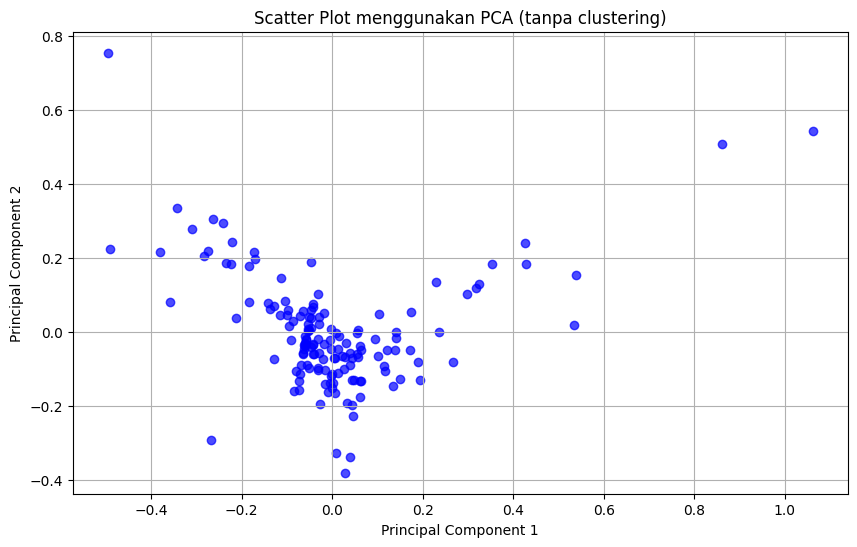

In [ ]:
# Plot hasil PCA tanpa clustering
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c='blue', alpha=0.7)
plt.title('Scatter Plot menggunakan PCA (tanpa clustering)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# *Clustering menggunakan K-Means*

In [ ]:
# Fungsi untuk menghitung jarak
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

In [ ]:
# Menginisialisasi posisi awal centroid
def initialize_centroids(data, k):
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

In [ ]:
# Menempatkan titik ke kluster terdekat
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

In [ ]:
#Update Centroid
def update_centroids(data, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            new_centroid = cluster_points.mean(axis=0)
            new_centroids.append(new_centroid)
        else:
            new_centroids.append(data[np.random.choice(data.shape[0])])
    return np.array(new_centroids)

In [ ]:
# Algoritma K-means
def kmeans(data, k, max_iters=100):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids

In [ ]:
# Menghitung within-cluster sum of squares
def calculate_wcss(data, clusters, centroids):
    wcss = 0
    for i, centroid in enumerate(centroids):
        cluster_points = data[clusters == i]
        wcss += np.sum((cluster_points - centroid) ** 2)
    return wcss

In [ ]:
# Menentukan rentang nilai k yang akan diuji
k_values = range(1, 11)
wcss_values = []

In [ ]:
# menentukan jumlah kluster yang optimal
for k in k_values:
    clusters, centroids = kmeans(data_pca, k)
    wcss = calculate_wcss(data_pca, clusters, centroids)
    wcss_values.append(wcss)

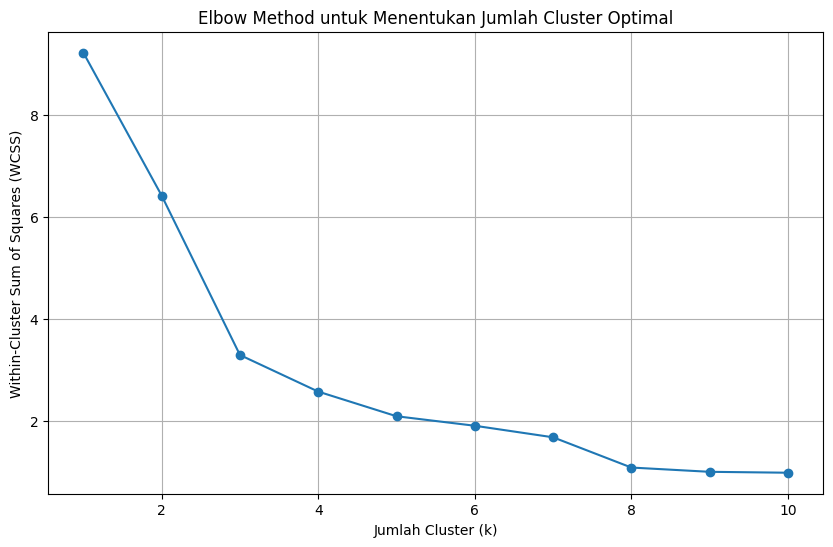

In [ ]:
# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss_values, marker='o')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [ ]:
# Menentukan jumlah cluster optimal berdasarkan Elbow Method
optimal_k = 3

# Menjalankan K-Means clustering dengan jumlah cluster optimal
clusters, centroids = kmeans(data_pca, optimal_k)

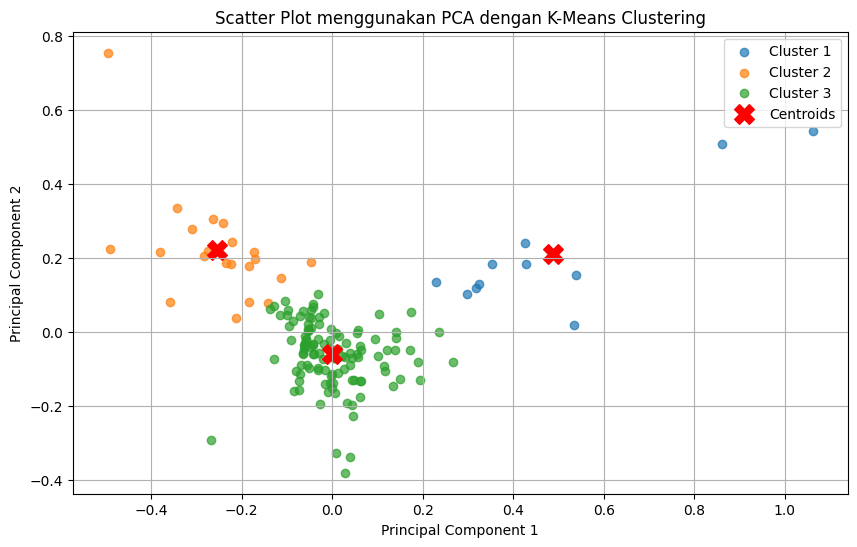

In [ ]:
# Plot hasil clustering dengan jumlah cluster optimal
plt.figure(figsize=(10, 6))
for i in range(optimal_k):
    cluster_points = data_pca[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], alpha=0.7, label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Scatter Plot menggunakan PCA dengan K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# *Evaluasi*

In [ ]:
# Fungsi untuk menghitung Silhouette Score
def silhouette_score(data, clusters, centroids):
    silhouette_scores = []
    for i in range(data.shape[0]):
        own_cluster = clusters[i]
        own_cluster_points = data[clusters == own_cluster]
        a = np.mean([euclidean_distance(data[i], point) for point in own_cluster_points])

        b = np.min([np.mean([euclidean_distance(data[i], point) for point in data[clusters == j]])
                    for j in range(len(centroids)) if j != own_cluster])

        silhouette_scores.append((b - a) / max(a, b))

    return np.mean(silhouette_scores)


In [ ]:
silhouette_avg = silhouette_score(data_pca, clusters, centroids)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.58
